In [88]:
import numpy as np
import os

import xobjects as xo
import xpart as xp
import xtrack as xt

import matplotlib.pyplot as plt

from xdyna.generic_writer import H5pyWriter, LocalWriter
from xdyna.ghost_particle_manager import GhostParticleManager
from xdyna.rem import ReverseErrorMethod

In [3]:
context = xo.ContextCpu(omp_num_threads="auto")

In [4]:
path = "/afs/cern.ch/work/a/afornara/public/HL_LHC_Studies/example_DA_study/master_study/master_jobs/2_configure_and_track/"

In [5]:
os.listdir(path)

['2_configure_and_track.py',
 'config.yaml',
 'misc.py',
 '__pycache__',
 'tree_maker.log',
 'correction',
 'test.py',
 'collider_no_BB.json',
 '.__afsAE96',
 '.__afs32AD',
 '.__afs82AC',
 '.__afs9097',
 '.__afs69C5',
 '.__afsF5A',
 'collider_BB.json',
 'output_particles.parquet',
 '.__afs4BC2',
 '.__afs5A39']

In [6]:
collider = xt.Multiline.from_json(os.path.join(path, "collider_no_BB.json"))

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           


In [7]:
collider.build_trackers()

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [8]:
line = collider.lhcb1

Disable xdeps expressions
Remove markers
Remove inactive multipoles
Merge consecutive multipoles
Remove redundant apertures
Remove zero length drifts
Merge consecutive drifts
Use simple bends
Use simple quadrupoles
Rebuild tracker data
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [117]:
n_samples = 50

x = np.linspace(0, 50, n_samples)
y = np.linspace(0, 50, n_samples)

xx, yy = np.meshgrid(x, y, indexing="ij")

xx = xx.flatten()
yy = yy.flatten()

In [123]:
twiss = line.twiss()

In [124]:
particles = line.build_particles(
    x_norm=xx,
    y_norm=yy,
    nemitt_x=3.5e-6,
    nemitt_y=3.5e-6,
)

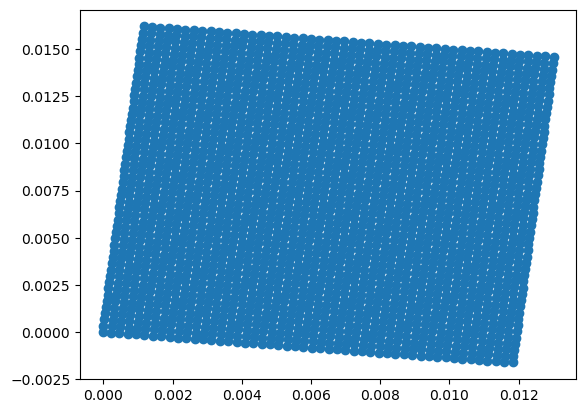

In [125]:
plt.scatter(particles.x, particles.y)

In [126]:
# line.optimize_for_tracking()
line.track(particles, num_turns=1000)

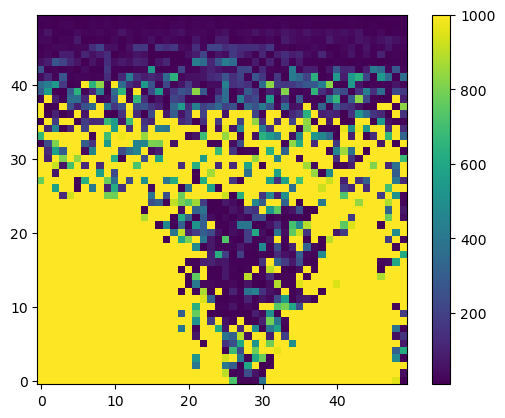

In [127]:
plt.imshow(particles.at_turn[particles.particle_id].reshape(n_samples, n_samples), origin="lower")
plt.colorbar()

In [109]:
local_writer = LocalWriter('test')

In [79]:
particle_manager = GhostParticleManager(
    particles,
    twiss=twiss,
    nemitt_x=3.5e-6,
    nemitt_y=3.5e-6,
)

particle_manager.add_displacement(module=1e-6, direction="x_norm")
particle_manager.add_displacement(module=1e-6, direction="px_norm")
particle_manager.add_displacement(module=1e-6, direction="y_norm")
particle_manager.add_displacement(module=1e-6, direction="py_norm")
particle_manager.add_displacement(module=1e-6, direction="zeta_norm")
particle_manager.add_displacement(module=1e-6, direction="pzeta_norm")

In [80]:
displacement, direction = particle_manager.get_displacement_data()

In [81]:
displacement

[array([1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06]),
 array([1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06]),
 array([1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06]),
 array([1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06]),
 array([1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06]),
 array([1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06])]

In [82]:
direction

[array([[1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 

In [83]:
particle_manager.track_displacement(
    line=line,
    sampling_turns=[10, 50, 100],
    out=local_writer
)

  0%|          | 0/100 [00:00<?, ?it/s]

In [84]:
d = local_writer.get_storage_element()

In [85]:
d["direction"]["ghost_x_norm_1e-06"]["x_norm"]

{'10': array([1., 1., 1., ..., 1., 1., 1.]),
 '50': array([1., 1., 1., ..., 1., 1., 1.]),
 '100': array([1., 1., 1., ..., 1., 1., 1.])}

In [86]:
d["displacement"]["ghost_x_norm_1e-06"]


{'10': array([-0.6, -0.6, -0.6, ..., -0.5, -0.5, -0.5]),
 '50': array([-0.6 , -0.6 , -0.6 , ..., -0.58, -0.58, -0.58]),
 '100': array([-0.6 , -0.6 , -0.6 , ..., -0.59, -0.59, -0.59])}

In [87]:
d["at_turn"]

array([100, 100, 100, ..., 100, 100, 100])

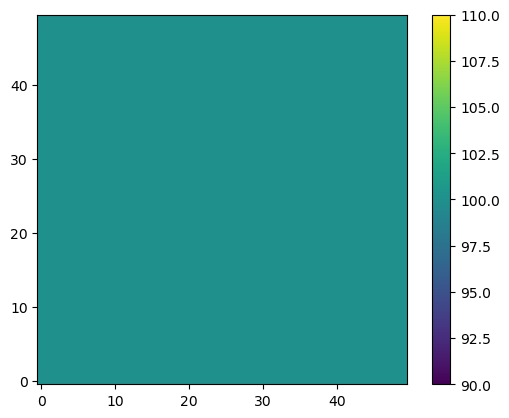

In [90]:
plt.imshow(d["at_turn"].reshape((n_samples, n_samples)), origin='lower')
plt.colorbar()

In [27]:
d

{'ghost_name': ['ghost_x_norm_1e-06',
  'ghost_px_norm_1e-06',
  'ghost_y_norm_1e-06',
  'ghost_py_norm_1e-06',
  'ghost_zeta_norm_1e-06',
  'ghost_pzeta_norm_1e-06'],
 'original_displacement': [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06],
 'original_direction': [array([1., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 1., 0.]),
  array([0., 0., 0., 0., 0., 1.])],
 'use_norm_coord': True,
 'displacement': {'ghost_x_norm_1e-06': {'10': array([-0.6       , -0.6       , -0.6       , ..., -0.60090521,
          -0.60090521, -0.60088621]),
   '100': array([-0.6       , -0.6       , -0.6       , ..., -0.60009052,
          -0.60009052, -0.60008862]),
   '200': array([-0.6       , -0.6       , -0.6       , ..., -0.60004526,
          -0.60004526, -0.60004431])},
  'ghost_px_norm_1e-06': {'10': array([-0.60088621, -0.6008682 , -0.6008682 , ..., -0.60000078,
          -0.60000078, -0.6000007 

In [28]:
displacement, direction = particle_manager.get_displacement_data()

In [29]:
displacement

[array([1.00000000e-06, 1.00000000e-06, 1.00000000e-06, ...,
        9.99999999e-07, 9.99999999e-07, 9.99999999e-07]),
 array([1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06]),
 array([1.00000000e-06, 1.00000000e-06, 1.00000000e-06, ...,
        9.99999999e-07, 9.99999999e-07, 9.99999999e-07]),
 array([1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06]),
 array([1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06]),
 array([1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06])]

In [30]:
direction

[array([[1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 